In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist



In [2]:
def load_data_NN():
    (train_x, train_y), (test_x, test_y) = mnist.load_data()
    train_x = train_x.astype('float32')
    test_x = test_x.astype('float32')
    train_x /= 255
    test_x /= 255
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
    return train_x, train_y, test_x, test_y

In [3]:
def DNN():
    model_dnn = Sequential()
    model_dnn.add(Flatten(input_shape=(28, 28, 1)))  # input layer
    model_dnn.add(Dense(128, activation='relu'))
    model_dnn.add(Dense(128, activation='relu'))
    model_dnn.add(Dense(10, activation='softmax'))
    model_dnn.compile(optimizer="adam",
                      loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model_dnn


In [4]:
def sample_prediction(index, x_test, y_test, model):
    plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
    pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
    print(np.argmax(pred))



Model Training
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2292 - accuracy: 0.9326
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0969 - accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0678 - accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9868
Model Evaluation
313/313 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9702

DNN Model Test accuracy: 0.9702000021934509

Sample Prediction
1/1 [==============================] - 0s 96ms/step
9


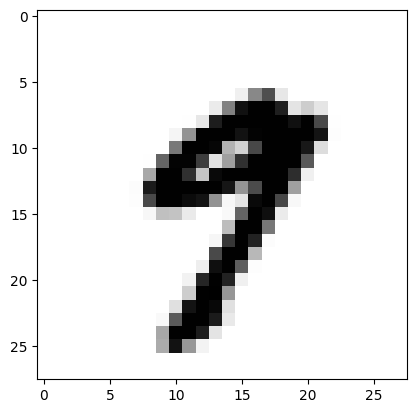

In [5]:
if __name__ == "__main__":
    # load data
    x_train, y_train, x_test, y_test = load_data_NN()
    # load the model
    model = DNN()
    print("Model Training")
    model.fit(x_train, y_train, epochs=5)
    print("Model Evaluation")
    model.evaluate(x_test, y_test)
    score1 = model.evaluate(x_test, y_test, verbose=1)
    print('\nDNN Model Test accuracy:', score1[1])
    print("\nSample Prediction")
    sample_prediction(20, x_test, y_test, model)
